# MINI PROJECT1 Web scraping
🔗 주소 : https://petitions.assembly.go.kr/closed/agreeEnded


# 데이터 수집

## 라이브러리 불러오기


In [4]:
import pandas as pd
import requests
import time

## 주소 불러오기
1. url 부르기
2. url 확인하기
- html (x)
- json (o)
3. json 주소로 부르기

✅ 청원 조건 정리(json 파라미터 정리)
1. 시작일 2022.01.01
2. 종료일 2022.12.31
3. 전체 청원 종류 다 가져오기


## json으로 데이터 프레임 만들기

In [5]:
# url 불러오기
page_no = 1
url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_no}&recordCountPerPage=8&sort=AGRE_END_DE-&beginDate=20220101&endDate=20221231'

In [6]:
# 판다스로 json 가져오기
df_json = pd.read_json(url, encoding='utf-8')
df_json

,rowNum,searchCondition,searchKeyword,pageIndex,pageUnit,firstIndex,lastIndex,recordCountPerPage,tableName,prefix,...,billId,currCommittee,currCommitteeId,committeeDt,billProcessDc,comments,likmsAt,trnsfInstt,trnsfRm,addDays
0,1,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,6,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,7,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,8,,,1,10,1,1,10,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
# 필요한 column 확인하기
df_json.columns
# petitId : 청원 하나 주소 파라미터. / petitSj : 청원 제목 / petitCn : 청원 내용 / petitRealmNm : 청원분야 
# resultCodeNm : 청원 결과 / agreCo : 동의 수 / agreBeginDe : 청원 시작일 / agreEndDe : 청원 만료일 

Index(['rowNum', 'searchCondition', 'searchKeyword', 'pageIndex', 'pageUnit',
       'firstIndex', 'lastIndex', 'recordCountPerPage', 'tableName', 'prefix',
       'sort', 'creatIp', 'creatId', 'creatDt', 'updtIp', 'updtId', 'updtDt',
       'petitTmprSn', 'hashtagCn', 'referUrlCn', 'beginDate', 'endDate',
       'ageCd', 'petitId', 'mberId', 'mberIdList', 'memberId', 'petrNm',
       'petitSj', 'petitObjet', 'petitReason', 'petitCn', 'petitRealmCode',
       'petitRealmCodeArray', 'petitRealmNm', 'petitRealmDetailCode',
       'petitRealmDetailNm', 'jrsdCmitCode', 'jrsdCmitCodeArray', 'jrsdCmitNm',
       'sttusCode', 'sttusCodeNm', 'sttusCodeArray', 'resultCode',
       'resultCodeArray', 'resultCodeNm', 'jdgmnStepCode',
       'jdgmnStepCodeArray', 'jdgmnStepCodeNm', 'petitUnacptCode',
       'petitUnacptCodeNm', 'petitUnacptCodeDc', 'petitUnacptRm',
       'petitRegistDt', 'petitOthbcDt', 'petitEndDt', 'petitRceptDt',
       'cmitFrwrdDt', 'apprvlBeginDe', 'apprvlEndDe', 'agreBegin

In [8]:
# 필요한 컬럼들만 불러오기
df_json = df_json[['petitId', 'petitRealmNm', 'petitSj', 'petitCn', 'agreBeginDe', 'agreEndDe', 'agreCo', 'resultCodeNm']]
cols = ['ID','청원 분야', '청원 제목', '청원 내용', '청원 시작일', '청원 종료일', '동의 수', '청원 결과']
df_json.columns = cols
df_json

,ID,청원 분야,청원 제목,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
0,E1F0409853F96C45E054B49691C1987F,보건의료,간호법 제정에 관한 청원,"현재 96개국에 '간호법'이 있고, OECD 국가 38개국 중 미국을 포함한 33개...",2022-11-30 09:52:59,2022-12-30 23:59:59,177,동의만료폐기
1,E2059AE3B2344B1BE054B49691C1987F,국토/해양/교통,"모든 학원, 상가 복도 cctv 의무화에 관한 청원",안녕하세요.\n봉담읍에 사는 초등학생 아이를 둔 엄마입니다.\n저희아이는 학원강의...,2022-11-30 09:53:21,2022-12-30 23:59:59,283,동의만료폐기
2,E1F0409854026C45E054B49691C1987F,국토/해양/교통,"인천 미추홀구뿐만 아니라 전국적인 ‘나 홀로 아파트, 빌라’ 전세사기에 관한 청원",○ 문제점\r\n낙찰자가 생겨 곧 퇴거해야하는 피해자들을 위한 ‘전세사기피해지원센터...,2022-11-30 09:52:01,2022-12-30 23:59:59,2250,동의만료폐기
3,EB0E1E2D986D1CA1E054B49691C1987F,저출산/고령화/아동/청소년/가족,난임부부지원 횟수의 확대 및 시험관 지원에 관한 청원,저는 아직 시험관을 시작하지 않은 결혼 2년차인 여성입니다.\r\n \r\n늦은 결...,2022-11-28 16:37:29,2022-12-28 23:59:59,567,동의만료폐기
4,E203F8AB7F384B18E054B49691C1987F,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,2022-11-28 16:40:33,2022-12-28 23:59:59,6165,동의만료폐기
5,E1F01D9BE93A6C4BE054B49691C1987F,보건의료,크론병을 앓고 있는 아들의 건강보험 적용 요청에 관한 청원,저의 아들은 크론병을 앓고 있습니다.\r\n크론병 치료나 완화에 사용되는 약 또는 ...,2022-11-28 16:39:26,2022-12-28 23:59:59,650,동의만료폐기
6,E1F0409853F26C45E054B49691C1987F,보건의료,난치성 편두통 환자를 위한 CGRP 표적 치료제의 급여혜택 강화 촉구에 관한 청원,"건강보험심사평가원에서 공개한 고시 자료[1]를 보면 대상 질환의 특성으로서 ""삽화편...",2022-11-28 16:39:49,2022-12-28 23:59:59,524,동의만료폐기
7,E1F0409853DF6C45E054B49691C1987F,재난/안전/환경,기업의 과대포장에 관한 청원,환경 문제가 날이 갈수록 심화되고 있습니다. 세계가 노력하고 있지만 여전히 부족하며...,2022-11-28 16:37:57,2022-12-28 23:59:59,157,동의만료폐기


## 청원의 취지 가져오는 함수만들기
### requests로 해보기
1. 청원의 취지는 html로 해보기
2. requests를 이용하여 응답 받음 (get 방식) <- 실패
3. beautifulSoup을 이용하여 취지 내용을 가져올 것


In [9]:
# 청원 페이지 주소 만들기
url_effet = 'https://petitions.assembly.go.kr/closed/agreeEnded/'
petit = df_json['ID'][0]
url_petit_1 = url_effet+petit
print(url_petit_1)

https://petitions.assembly.go.kr/closed/agreeEnded/E1F0409853F96C45E054B49691C1987F


In [10]:
# reqeusts 응답 받기
reponse = requests.get(url_petit_1)
reponse.status_code # 거부당함

404

In [11]:
# 헤더를 추가 해야하는가? 
headers = {"user-agent": "Mozilla/5.0"}
reponse = requests.get(url_petit_1, headers=headers)
reponse.status_code  # 실패

404

### json 주소로 해보기


In [12]:
# json으로 받기 
petit = df_json['ID'][3]
url_effect = f'https://petitions.assembly.go.kr/api/petits/{petit}'
print(url_effect)

https://petitions.assembly.go.kr/api/petits/EB0E1E2D986D1CA1E054B49691C1987F


In [13]:
# 응답 확인하기
response = requests.get(url_effect)
response.status_code

200

In [14]:
# json 취지 찾기
content = response.json()
reason = content['petitObjet']
reason

'난임부부지원 횟수의 확대'

In [15]:
# 함수 만들기
def reason(df_json_id):
    '''
    취지 가져오기
    1. 취지를 위한 url 준비
    2. requests로 응답 받기
    3. json으로 받아서 취지 가져오기
    '''
    url_effect = f'https://petitions.assembly.go.kr/api/petits/{df_json_id}'
    headers = {"user-agent": "Mozilla/5.0"}
    response = requests.get(url_effect, headers = headers)
    content = response.json()
    reason = content['petitObjet']
    time.sleep(0.01)
    return reason

In [16]:
reason(df_json['ID'][7])

'1) 과대포장 문제를 해결하기 위함입니다.\r\n2) 국가의 일회용품 소비를 줄이기 위함입니다. '

## 한 페이지 청원 불러오는 함수만들기 (취지까지)

In [19]:
def page_pepit(page_no):
    '''
    한페이지 청원불러오기
    1. 페이지 url 부르기
    2. 판다스로 json 데이터프레임 불러오기
    3. 청원 취지 받아오기
    4. 취지를 df_json에 추가하기
    5. 필요한 컬럼만 불러오기
    ['petitRealmNm', 'petitSj', 'petitObjet', 'petitCn', 'agreBeginDe', 'petitEndDt', 'agreCo', 'resultCodeNm']
    6. 컬럼명 변경하기
    7. df_json 리턴하기
    3. 필요한 컬럼들만 불러오기
    
    4. 청원 취지 받아오기
    5. 취지를 df_json에 추가하기
    6. 컬럼명 변경해주기
    6-1. petitId 컬럼 삭제하기
    7. df_json 리턴하기
    '''
    try:
        url = f'https://petitions.assembly.go.kr/api/petits?pageIndex={page_no}&recordCountPerPage=8&sort=AGRE_END_DE-&beginDate=20220101&endDate=20221231'
        df_json = pd.read_json(url, encoding='utf-8',)
        cont_list = [reason(df_json['petitId'][i]) for i in range(len(df_json))]
        df_json['petitObjet'] = cont_list
        df_json = df_json[['petitRealmNm', 'petitSj', 'petitObjet', 'petitCn', 'agreBeginDe', 'petitEndDt', 'agreCo', 'resultCodeNm']]
        cols = ['청원 분야', '청원 제목', '청원 취지', '청원 내용', '청원 시작일', '청원 종료일', '동의 수', '청원 결과']
        df_json.columns = cols
        return df_json
    except Exception as e:
        print(f'{e} 오류가 발생했습니다.')

In [20]:
page_pepit(1)

,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
0,보건의료,간호법 제정에 관한 청원,"'간호법' 제정을 통해 간호사의 영역과 업무 범위를 명확화 하고, 간호 서비스 개선...","현재 96개국에 '간호법'이 있고, OECD 국가 38개국 중 미국을 포함한 33개...",2022-11-30 09:52:59,2022-12-31 00:01:00,177,동의만료폐기
1,국토/해양/교통,"모든 학원, 상가 복도 cctv 의무화에 관한 청원",CCTV없는곳에서 일어나는 폭력을 막아주세요.,안녕하세요.\n봉담읍에 사는 초등학생 아이를 둔 엄마입니다.\n저희아이는 학원강의...,2022-11-30 09:53:21,2022-12-31 00:01:00,283,동의만료폐기
2,국토/해양/교통,"인천 미추홀구뿐만 아니라 전국적인 ‘나 홀로 아파트, 빌라’ 전세사기에 관한 청원",저는 전세사기 피해자입니다.\r\n\r\n전국적으로 발생한 전세사기 피해에 대한 현...,○ 문제점\r\n낙찰자가 생겨 곧 퇴거해야하는 피해자들을 위한 ‘전세사기피해지원센터...,2022-11-30 09:52:01,2022-12-31 00:01:00,2250,동의만료폐기
3,저출산/고령화/아동/청소년/가족,난임부부지원 횟수의 확대 및 시험관 지원에 관한 청원,난임부부지원 횟수의 확대,저는 아직 시험관을 시작하지 않은 결혼 2년차인 여성입니다.\r\n \r\n늦은 결...,2022-11-28 16:37:29,2022-12-29 00:01:00,567,동의만료폐기
4,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국거래소협회 DAXA에 의한 위믹스코인 거래지원 종료에 대한 투명성 조사와 갑질 ...,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,2022-11-28 16:40:33,2022-12-29 00:01:00,6165,동의만료폐기
5,보건의료,크론병을 앓고 있는 아들의 건강보험 적용 요청에 관한 청원,크론병 환자의 건강보험 적용에 대한 건의,저의 아들은 크론병을 앓고 있습니다.\r\n크론병 치료나 완화에 사용되는 약 또는 ...,2022-11-28 16:39:26,2022-12-29 00:01:00,650,동의만료폐기
6,보건의료,난치성 편두통 환자를 위한 CGRP 표적 치료제의 급여혜택 강화 촉구에 관한 청원,WHO에서는 세계에서 두번째로 질병 부담이 높은 질환이 편두통이라고 발표했습니다. ...,"건강보험심사평가원에서 공개한 고시 자료[1]를 보면 대상 질환의 특성으로서 ""삽화편...",2022-11-28 16:39:49,2022-12-29 00:01:00,524,동의만료폐기
7,재난/안전/환경,기업의 과대포장에 관한 청원,1) 과대포장 문제를 해결하기 위함입니다.\r\n2) 국가의 일회용품 소비를 줄이기...,환경 문제가 날이 갈수록 심화되고 있습니다. 세계가 노력하고 있지만 여전히 부족하며...,2022-11-28 16:37:57,2022-12-29 00:01:00,157,동의만료폐기


## 전체 청원 불러오기
1. 무한 루프 만들기
2. 한페이지 프레임 불러오기
3. 불러온 페이지에 아무것도 없으면 루프 탈출(마지막 페이지까지 찾기)
4. 혹시모를 상황에 대비해 csv 파일을 저장해 두기
5. page를 1씩 증가 시키기
6. 서버에 과부하를 줄이기 위해 time.sleep 사용

In [24]:
# 테이블이 없는 마지막 페이지까지 df_list 받기
def get_df():
    # 프레임 리스트를 생성
    df_list=[]
    page = 1

    while 1:
        df_one = page_pepit(page)
        if df_one is None or (len(df_one)==0):
            break
        df_one.to_csv(f'petit\petit_{page}p.csv', index = False)
        df_list.append(df_one)
        page += 1
        time.sleep(0.01)

    df = pd.concat(df_list, ignore_index = True)
    return df

In [25]:
start = time.time()
all_petit =get_df()
end = time.time()

print(f"{end - start:.5f} sec")

"['petitRealmNm', 'petitSj', 'petitCn', 'agreBeginDe', 'petitEndDt', 'agreCo', 'resultCodeNm'] not in index" 오류가 발생했습니다.
102.77623 sec


## 파일 저장하기

In [27]:
df = all_petit
file_name = 'petitions2022.csv'
df.to_csv(file_name, index = False)

In [29]:
df = pd.read_csv(file_name)
df

,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
0,보건의료,간호법 제정에 관한 청원,"'간호법' 제정을 통해 간호사의 영역과 업무 범위를 명확화 하고, 간호 서비스 개선...","현재 96개국에 '간호법'이 있고, OECD 국가 38개국 중 미국을 포함한 33개...",2022-11-30 09:52:59,2022-12-31 00:01:00,177,동의만료폐기
1,국토/해양/교통,"모든 학원, 상가 복도 cctv 의무화에 관한 청원",CCTV없는곳에서 일어나는 폭력을 막아주세요.,안녕하세요.\n봉담읍에 사는 초등학생 아이를 둔 엄마입니다.\n저희아이는 학원강의...,2022-11-30 09:53:21,2022-12-31 00:01:00,283,동의만료폐기
2,국토/해양/교통,"인천 미추홀구뿐만 아니라 전국적인 ‘나 홀로 아파트, 빌라’ 전세사기에 관한 청원",저는 전세사기 피해자입니다.\r\n\r\n전국적으로 발생한 전세사기 피해에 대한 현...,○ 문제점\r\n낙찰자가 생겨 곧 퇴거해야하는 피해자들을 위한 ‘전세사기피해지원센터...,2022-11-30 09:52:01,2022-12-31 00:01:00,2250,동의만료폐기
3,저출산/고령화/아동/청소년/가족,난임부부지원 횟수의 확대 및 시험관 지원에 관한 청원,난임부부지원 횟수의 확대,저는 아직 시험관을 시작하지 않은 결혼 2년차인 여성입니다.\r\n \r\n늦은 결...,2022-11-28 16:37:29,2022-12-29 00:01:00,567,동의만료폐기
4,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국거래소협회 DAXA에 의한 위믹스코인 거래지원 종료에 대한 투명성 조사와 갑질 ...,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,2022-11-28 16:40:33,2022-12-29 00:01:00,6165,동의만료폐기
...,...,...,...,...,...,...,...,...
346,수사/법무/사법제도,양승태 전 대법원장 재임기간 중의 사법농단 의혹사건 피해자 구제를 위한 특별법안 제...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 설치 등 특정 목적을 관철 시...,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다.\n1. “사법농단피해자...,2021-12-13 17:47:48,2022-01-13 00:01:00,429,동의만료폐기
347,정치/선거/국회운영,수개표로 전환 안심 선거에 관한 청원,안녕하십니까? \n\n공직선거에서 전자개표가 도입된 이래 끊임없이 부정선거의 논란이...,1. ‘당일 투표’를 기본 원칙으로 한다.\n\n부정선거의 가능성이 높은 사전투표와...,2021-12-07 16:21:09,2022-01-07 00:01:00,3034,동의만료폐기
348,복지/보훈,발달재활서비스 제공 인력의 생존권을 위한 자격 인정 제도 개선에 관한 청원,"수많은 치료사 ,선생님들 지금거리로 몰리고있습니다 도와주세요...",\n발달재활서비스 제공인력 인증 강화 심사에 대해 청원합니다.\n\n안녕하세요. 경...,2021-12-07 16:22:35,2022-01-07 00:01:00,210,동의만료폐기
349,정치/선거/국회운영,안심 선거를 위한 수개표 전환에 관한 청원,안녕하십니까?\n\n공직선거에서 전자개표가 도입된 이래 끊임없이 부정선거의 논란이 ...,1. '당일 투표'를 기본 원칙으로 한다.\n\n부정선거의 가능성이 높은 사전투표와...,2021-12-07 16:21:38,2021-12-13 18:54:23,736,진행중철회


# 데이터 확인

In [56]:
# 데이터의 개수와 컬럼 수 확인
df.shape

(351, 8)

In [33]:
# 조원들과 데이터수가 다른 것을 확인할 수 있었다.
# 내 코드에는 진행중철회가 들어갔기 때문,
# 진행중철회 코드가 들어가면 정확한 청원을 확인하기 어렵기 때문에 없애준다.
df = df[df['청원 결과'] != '진행중철회'].copy()
df

,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
0,보건의료,간호법 제정에 관한 청원,"'간호법' 제정을 통해 간호사의 영역과 업무 범위를 명확화 하고, 간호 서비스 개선...","현재 96개국에 '간호법'이 있고, OECD 국가 38개국 중 미국을 포함한 33개...",2022-11-30 09:52:59,2022-12-31 00:01:00,177,동의만료폐기
1,국토/해양/교통,"모든 학원, 상가 복도 cctv 의무화에 관한 청원",CCTV없는곳에서 일어나는 폭력을 막아주세요.,안녕하세요.\n봉담읍에 사는 초등학생 아이를 둔 엄마입니다.\n저희아이는 학원강의...,2022-11-30 09:53:21,2022-12-31 00:01:00,283,동의만료폐기
2,국토/해양/교통,"인천 미추홀구뿐만 아니라 전국적인 ‘나 홀로 아파트, 빌라’ 전세사기에 관한 청원",저는 전세사기 피해자입니다.\r\n\r\n전국적으로 발생한 전세사기 피해에 대한 현...,○ 문제점\r\n낙찰자가 생겨 곧 퇴거해야하는 피해자들을 위한 ‘전세사기피해지원센터...,2022-11-30 09:52:01,2022-12-31 00:01:00,2250,동의만료폐기
3,저출산/고령화/아동/청소년/가족,난임부부지원 횟수의 확대 및 시험관 지원에 관한 청원,난임부부지원 횟수의 확대,저는 아직 시험관을 시작하지 않은 결혼 2년차인 여성입니다.\r\n \r\n늦은 결...,2022-11-28 16:37:29,2022-12-29 00:01:00,567,동의만료폐기
4,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국거래소협회 DAXA에 의한 위믹스코인 거래지원 종료에 대한 투명성 조사와 갑질 ...,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,2022-11-28 16:40:33,2022-12-29 00:01:00,6165,동의만료폐기
...,...,...,...,...,...,...,...,...
345,과학기술/정보통신,n번방 방지법인 전기통신사업법 개정안의 재개정에 관한 청원,"헌법 제 18조를 위배하며, 법의 효율성이 의심되는 해당 개정안에 대한 개정을 바람","먼저, 해당 개정안은 헌법 제18조를 위배할 우려가 큽니다. ""모든 국민은 통신의 ...",2021-12-13 17:49:00,2022-01-13 00:01:00,1853,동의만료폐기
346,수사/법무/사법제도,양승태 전 대법원장 재임기간 중의 사법농단 의혹사건 피해자 구제를 위한 특별법안 제...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 설치 등 특정 목적을 관철 시...,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다.\n1. “사법농단피해자...,2021-12-13 17:47:48,2022-01-13 00:01:00,429,동의만료폐기
347,정치/선거/국회운영,수개표로 전환 안심 선거에 관한 청원,안녕하십니까? \n\n공직선거에서 전자개표가 도입된 이래 끊임없이 부정선거의 논란이...,1. ‘당일 투표’를 기본 원칙으로 한다.\n\n부정선거의 가능성이 높은 사전투표와...,2021-12-07 16:21:09,2022-01-07 00:01:00,3034,동의만료폐기
348,복지/보훈,발달재활서비스 제공 인력의 생존권을 위한 자격 인정 제도 개선에 관한 청원,"수많은 치료사 ,선생님들 지금거리로 몰리고있습니다 도와주세요...",\n발달재활서비스 제공인력 인증 강화 심사에 대해 청원합니다.\n\n안녕하세요. 경...,2021-12-07 16:22:35,2022-01-07 00:01:00,210,동의만료폐기


## 결측치 & 중복값 확인

In [34]:
# 결측치 확인
df.isnull().sum()

청원 분야     0
청원 제목     0
청원 취지     0
청원 내용     0
청원 시작일    0
청원 종료일    0
동의 수      0
청원 결과     0
dtype: int64

📝 각 컬럼마다 결측치 수가 0이므로 **결측치가 없음**을 확인할 수 있다.

In [35]:
# 데이터 중복값 확인
df.duplicated().sum() # 없음

0

📝 데이터의 중복값을 확인해 보았을 때, 중복값 True 가 0이므로 중복 값이 없음을 확인할 수 있음

💡 하지만 내용이 같지만 데이터가 다른 것은 찾아낼 수가 없음
## 요약값 확인

In [36]:
# 요약
display(df.describe())
display(df.describe(include = 'O'))

,동의 수
count,339.000000
mean,6306.053097
std,14732.770807
min,108.000000
25%,214.500000
50%,473.000000
75%,2505.000000
max,100000.000000


,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,청원 결과
count,339,339,339,339,339,339,339
unique,18,334,335,338,339,117,4
top,보건의료,코로나 백신 접종 중단과 부작용 피해 조사에 관한 청원,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...,# 관련 파일 첨부 참조 요망 #\n제2조(정의) 이 법에서 사용하는 용어의 뜻은 ...,2022-11-30 09:52:59,2022-09-01 00:01:00,동의만료폐기
freq,57,3,4,2,1,13,311


In [37]:
# max값의 데이터 찾아보기
display(df[df['동의 수']==100000])
# 2022년 청원 성립 동의수 50,000 초과인 데이터 찾기
display(df[df['동의 수']>50000])

,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
350,정치/선거/국회운영,22년 3월 대선에서 수개표 시행을 위한 공직선거법 개정에 관한 청원,공직선거에서 전자개표가 도입된 이래 끊임없이 부정선거의 논란이 계속되고 있습니다. ...,1. ‘당일 투표’만 시행한다는 내용을 개정법안에 명시해 주십시오.\n\n부정선거의...,2021-12-07 16:22:05,2022-01-06 14:49:10,100000,위원회심사


,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
350,정치/선거/국회운영,22년 3월 대선에서 수개표 시행을 위한 공직선거법 개정에 관한 청원,공직선거에서 전자개표가 도입된 이래 끊임없이 부정선거의 논란이 계속되고 있습니다. ...,1. ‘당일 투표’만 시행한다는 내용을 개정법안에 명시해 주십시오.\n\n부정선거의...,2021-12-07 16:22:05,2022-01-06 14:49:10,100000,위원회심사


💡 동의 수가 100,000인 경우는 청원 시작일이 2021년부터였으며 청원 성립 동의 수가 100,000개 이기 때문에 나타남

💡 그리고 50,000이 초과되는 경우를 찾아보니 데이터가 없었음

In [38]:
display(df[df['청원 제목'].duplicated() == True])
display(df[df['청원 취지'].duplicated() == True])
display(df[df['청원 내용'].duplicated() == True])

,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
316,보건의료,코로나 백신 접종 중단과 부작용 피해 조사에 관한 청원,안녕하십니까? \n\n임상시험도 끝나지 않은 채 긴급 (임시) 승인된 코로나 백신의...,1. 코로나 백신 접종 중단과 성분 정밀 조사\n\n실험 백신의 접종을 중단한 나라...,2022-03-28 15:45:38,2022-04-28 00:01:00,3050,동의만료폐기
323,보건의료,코로나 백신 접종 중단과 부작용 피해 조사에 관한 청원,안녕하십니까? \n\n임상시험도 끝나지 않은 채 긴급 (임시) 승인된 코로나 백신의...,1. 코로나 백신 접종 중단과 성분 정밀 조사\n\n실험 백신의 접종을 중단한 나라...,2022-02-08 17:10:44,2022-03-11 00:01:00,2151,동의만료폐기
324,보건의료,정상 일상 복귀와 반민주 방역 금지에 관한 청원,"안녕하십니까? \n\n저는 건강전문작가로 일하는 이송미라고 합니다. 20년 전, 어...",1. CDC가 승인 철회한 PCR 비롯해 모든 코로나 검사 즉각 중단 \n\n코로나...,2022-02-08 17:10:59,2022-03-11 00:01:00,2070,동의만료폐기
338,보건의료,정상 일상 복귀와 반민주 방역 금지에 관한 청원,"안녕하십니까? \n\n저는 건강전문작가로 일하는 이송미라고 합니다. 20년 전, 어...",1. 외국 법원들이 ‘진단에 부적합’ 판결한 코로나 검사 즉각 중단 \n\n코로...,2021-12-27 15:46:10,2022-01-27 00:01:00,6405,동의만료폐기
346,수사/법무/사법제도,양승태 전 대법원장 재임기간 중의 사법농단 의혹사건 피해자 구제를 위한 특별법안 제...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 설치 등 특정 목적을 관철 시...,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다.\n1. “사법농단피해자...,2021-12-13 17:47:48,2022-01-13 00:01:00,429,동의만료폐기


,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
139,수사/법무/사법제도,양승태 전대법원장 재임기간중의 사법 농단 피해자 구제를 위한 특별 법안 제정및 김용...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...,# 아래 관련 파일 첨부 참조 요망 #\n제2조(정의) 이 법에서 사용하는 용어의 ...,2022-08-09 17:03:55,2022-09-09 00:01:00,353,동의만료폐기
201,수사/법무/사법제도,양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안 제정 및 김용민 국회의원...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...,# 관련 파일 첨부 참조 요망 #\n제2조(정의) 이 법에서 사용하는 용어의 뜻은 ...,2022-06-30 15:24:47,2022-07-31 00:01:00,1073,동의만료폐기
281,수사/법무/사법제도,양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안 제정및 김용민 국회 의원...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...,# 관련 파일 첨부 참조 요망 #\n제2조(정의) 이 법에서 사용하는 용어의 뜻은 ...,2022-05-25 16:24:22,2022-06-26 00:01:00,2352,동의만료폐기
346,수사/법무/사법제도,양승태 전 대법원장 재임기간 중의 사법농단 의혹사건 피해자 구제를 위한 특별법안 제...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 설치 등 특정 목적을 관철 시...,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다.\n1. “사법농단피해자...,2021-12-13 17:47:48,2022-01-13 00:01:00,429,동의만료폐기


,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
281,수사/법무/사법제도,양승태 전대법원장 사법 농단 피해자 구제를 위한 특별 법안 제정및 김용민 국회 의원...,양승태 전 대법원장 체제하에서의 대법원이 상고 법원 \n설치 등 특정 목적을 관철 ...,# 관련 파일 첨부 참조 요망 #\n제2조(정의) 이 법에서 사용하는 용어의 뜻은 ...,2022-05-25 16:24:22,2022-06-26 00:01:00,2352,동의만료폐기


📝object 요약을 통해서 청원 제목이 중복되는 데이터가 있음을 확인할 수 있었다.
- 총 데이터의 수는 351개이며 청원의 제목 개수가 346개임을 확인 할 수 있다.

📝또한 청원 취지와 내용도 중복되는 데이터가 있음을 확인 가능하다.

💡duplicated는 중복된 값 1개를 보여주지 않기 때문에 위치 확인이 어려움

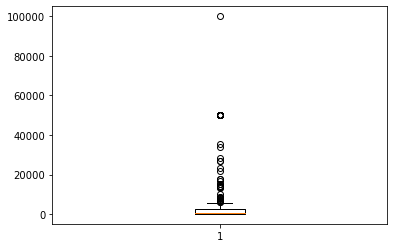

In [39]:
# 이상치 확인
##  IQR method
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot(df['동의 수'])
plt.show()

📝 이상치가 존재함을 확인할 수 있음

💡 값이 100,000인 것을 보아 아까 위에서 찾은 max 데이터임

In [40]:
# 사분위수 구하기 
q1 = df.describe()['동의 수']['25%']
q3 = df.describe()['동의 수']['75%']

# IQR값 구하기 
iqr = q3-q1

# 이상치 
df[df['동의 수'] > q3 + 1.5 * iqr]

,청원 분야,청원 제목,청원 취지,청원 내용,청원 시작일,청원 종료일,동의 수,청원 결과
4,재정/세제/금융/예산,가상자산 위믹스 코인 거래지원종료에 관한 DAXA의 처리 투명성과 갑질논란에 관한 청원,한국거래소협회 DAXA에 의한 위믹스코인 거래지원 종료에 대한 투명성 조사와 갑질 ...,한국 거래소협회 DAXA는 10월27일 계획유통량과 실제유통량의 차이를 원인으로 삼...,2022-11-28 16:40:33,2022-12-29 00:01:00,6165,동의만료폐기
17,재난/안전/환경,곰 사육 금지 및 보호에 관한 특별법안 통과에 관한 청원,‘곰 사육 금지 및 보호에 관한 특별법안’ 국회 통과를 통해 부끄러운 곰 사육 산업...,‘웅담채취용 사육곰’ \r\n모든 곰은 국제적 멸종위기종으로 철저히 보호받습니다. ...,2022-11-22 16:33:36,2022-12-23 00:01:00,21560,동의만료폐기
36,수사/법무/사법제도,연쇄 성범죄자 수원발발이 박○○의 퇴거를 강력히 촉구합니다에 관한 청원,저는 경기도 화성시 봉담읍 수기초등학교 운영위원장 입니다\r\n\r\n연쇄성범죄자...,- 10월 28일(금) 성범죄자의 어머니(수원 호매실 거주)께서 봉담읍 원룸촌에서 ...,2022-11-08 15:46:37,2022-12-05 07:03:56,50000,위원회심사
41,재난/안전/환경,할로윈 행사 영구 폐지 요청에 관한 청원,이번 이태원 할로윈 대참사가 다시는 발생하지 않도록 하기위함입니다,이태원 할로윈 대 참사를 방송하면서\r\n기자는\r\n이 할로윈 행사를 앞으로도 막...,2022-11-03 17:47:29,2022-12-04 00:01:00,7741,동의만료폐기
44,재난/안전/환경,이태원사건 지원금에 관한 청원,이태원사건에 대해 지원금 주는것을 반대합니다,"이태원에서 사망,실종,부상에 대해 안타깝고 애도를 표합니다.\r\n하지만 즐기기위해...",2022-11-01 20:43:12,2022-12-02 00:01:00,8232,동의만료폐기
48,재정/세제/금융/예산,"1,400만명 개인주주를 절망에 빠트리고 건전한 자본시장을 좀먹는 공매도의 한시적 ...",1) 본 청원은 우리 증시를 글로벌 증시 대비 과도하게 하락한 상황이 정상화될 때까...,현재 우리나라 증시는 공매도 세력들의 놀이터가 되어버렸습니다. 우리나라 공매도 거래...,2022-10-31 17:00:18,2022-12-01 00:01:00,28405,동의만료폐기
57,보건의료,2023년 육휴급여와 부모급여 중복지원 강력 요구에 관한 청원,저출산과 복지를 위함에 있어 현실반영없이 퇴행하려는 정책을 막기 위함입니다,10월 뉴스기사 내용을 토대로 문제의 심각성을 느껴 청원하는 바입니다. 2023년부...,2022-10-26 16:19:17,2022-11-26 00:01:00,17658,동의만료폐기
60,국토/해양/교통,검단신도시 대규모 물류센터 건립허가 결사반대에 관한 청원,"안녕하세요. 검단신도시 입주민입니다.\r\n\r\nLH는 올 4월에 ""인천검단지구 ...","검단신도시는 정부가 주거 안정을 위해 계획한 대규모 주거밀집 지역으로, 1단계 사...",2022-10-26 16:19:03,2022-11-26 00:01:00,6904,동의만료폐기
68,과학기술/정보통신,언론자유와 공영방송의 정치적 독립을 위한 법률 개정에 관한 청원,"최근 윤석열 대통령의 비속어,욕설 파문 이후 집권 세력에 의한 언론자유 탄압과 방송...",1. 현황\r\n○ 한국의 공영방송은 역사적으로 제도권 정치의 권력 향배에서 자유롭...,2022-10-20 17:51:19,2022-11-18 09:22:24,50000,본회의불부의
72,국토/해양/교통,시대를 역행하는 중개협회 의무가입 법안 발의 반대에 관한 청원,최근 한국공인중개사협회(이하 협회)를 법정단체로 하는 법안이 발의되었습니다. 모든 ...,미국의 저명한 미래학자 앨빈토플러는 '제3의물결'을 주창하며 정보화 시대를 미리 예...,2022-10-17 17:43:23,2022-11-17 00:01:00,9928,동의만료폐기


📝 IQR로 구한 이상치는 총 61개가 있지만 청원이 성립되기 위해서는 50,000개가 되어야 하고 동의를 받은 값이기 때문에 변경할 수가 없다.

### 🔥결론🔥
데이터의 결측치와 중복값을 확인해 본 결과 데이터 자체의 중복되거나 결측된 값은 없었으며

객체 타입의 데이터를 요약한 값을 확인해 본 결과 같은 제목, 취지, 내용인 청원이 있었다.

수치형 데이터를 요약 및 이상치를 찾아본 결과 2021년에 시작한 청원에서 성립 동의 수가 100,000여야 가능함을 확인할 수 있었고,

데이터를 분석할 때 성립된 청원과 동의만료폐기 청원으로 나눠서 분석할 것이다.

# 데이터 시각화

In [41]:
# 라이브러리 불러오기

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [42]:
# 시각화를 위한 폰트 설정
import os

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")
    
# 레티나 설정을 해주면 글씨가 좀더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format='retina'

## 	청원 분야 분포 확인

Text(0, 0.5, '')

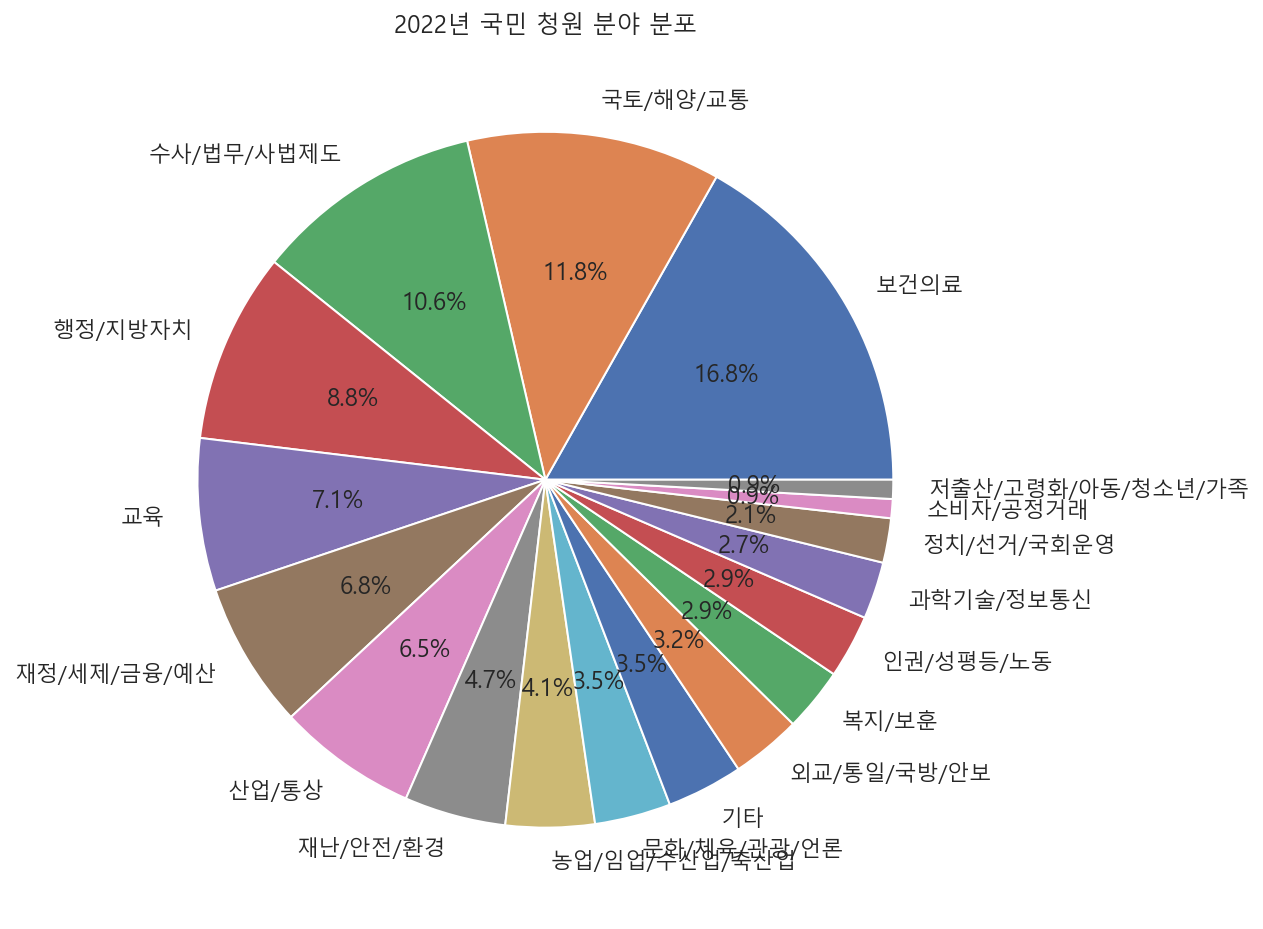

In [43]:
df['청원 분야'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('2022년 국민 청원 분야 분포')
plt.ylabel('')

📝청원 수가 가장 많은 분야는 보건 의료이며 가장 작은 분야는 저출산/고령화/아동/청소년/가족이다.

📝 다음 가장 많은 분야는 국토/해양/교통, 그 다음은 수사/법무/사법제도이다.

💡 2022년에도 해결되지 못한 코로나 때문에 많은 것으로 추정
자세한 것은 워드 클라우드를 통해 확인해볼 것

### 추가) 보건의료 분야 단어 클라우딩 해보기

In [44]:
stop_words =['있다','있습니다','있는','하는','것이다','밝혔다','위해','대해','했다',
               '따르면','청원','것으로','말했다','지원','국민','삭감','촉구','금지', '요청']

df_w = df.copy()
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk

tokenizer = Okt()
kor_text = '...'
# print(tokenizer.nouns(kor_text))
df_w['tokenized'] = df_w['청원 제목'].apply(tokenizer.nouns)
df_w['tokenized'] = df_w['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item) > 1])

health_petit = np.hstack(df_w[df_w['청원 분야']=='보건의료']['tokenized'].values)
health_petit

array(['간호', '제정', '크론병', '아들', '건강', '보험', '적용', '난치', '편두통', '환자', '표적',
       '치료', '제의', '급여', '혜택', '강화', '살인', '백신', '패스', '부활', '결사', '반대',
       '건강', '보호', '증진', '간호', '제정', '감염병', '전문가', '방송출연', '진자', '집계',
       '중단', '이태원', '압사', '자동', '심장', '충격', '보급', '체계', '의무', '설치', '범위',
       '확대', '백신', '부작용', '피해', '보상', '특별법', '제정', '급여', '부모', '급여', '중복',
       '강력', '요구', '미용', '업계', '관련', '생태계', '파괴', '미용', '업자', '종사', '고충',
       '질병', '관리', '대국민', '사과', '공중보건', '용어', '삭제', '코로나', '방역', '조치',
       '전면', '해제', '코로나', '환자', '숫자', '집계', '중단', '검사', '전면', '중단', '코로나',
       '백신', '접종', '중단', '인산', '혈증', '구루병', '치료', '크리스', '비타', '신속', '사용',
       '승인', '미숙아', '반대', '증액', '아이', '임부', '부의', '임지원', '횟수', '제한', '폐지',
       '정부', '즉시', '실내', '마스크', '강제', '중지', '조현병', '환자', '퇴원', '명령',
       '아주대', '학교', '병원', '행태', '대한', '정부', '진상', '조사', '시정', '조치', '요구',
       '여성', '유방', '축소', '건보', '적용', '유방암', '치료', '신속', '승인', '감염병', '예방',
       '법률', '마스크', '관련', '조항', '삭제', '재개', 

In [45]:
health_petit_word_count = Counter(health_petit)
print(health_petit_word_count.most_common(20))

[('백신', 9), ('환자', 8), ('중단', 8), ('코로나', 7), ('부작용', 6), ('치료', 5), ('방역', 5), ('조사', 5), ('제정', 4), ('급여', 4), ('의무', 4), ('피해', 4), ('접종', 4), ('승인', 4), ('정상', 4), ('복귀', 4), ('반대', 3), ('감염병', 3), ('확대', 3), ('관련', 3)]


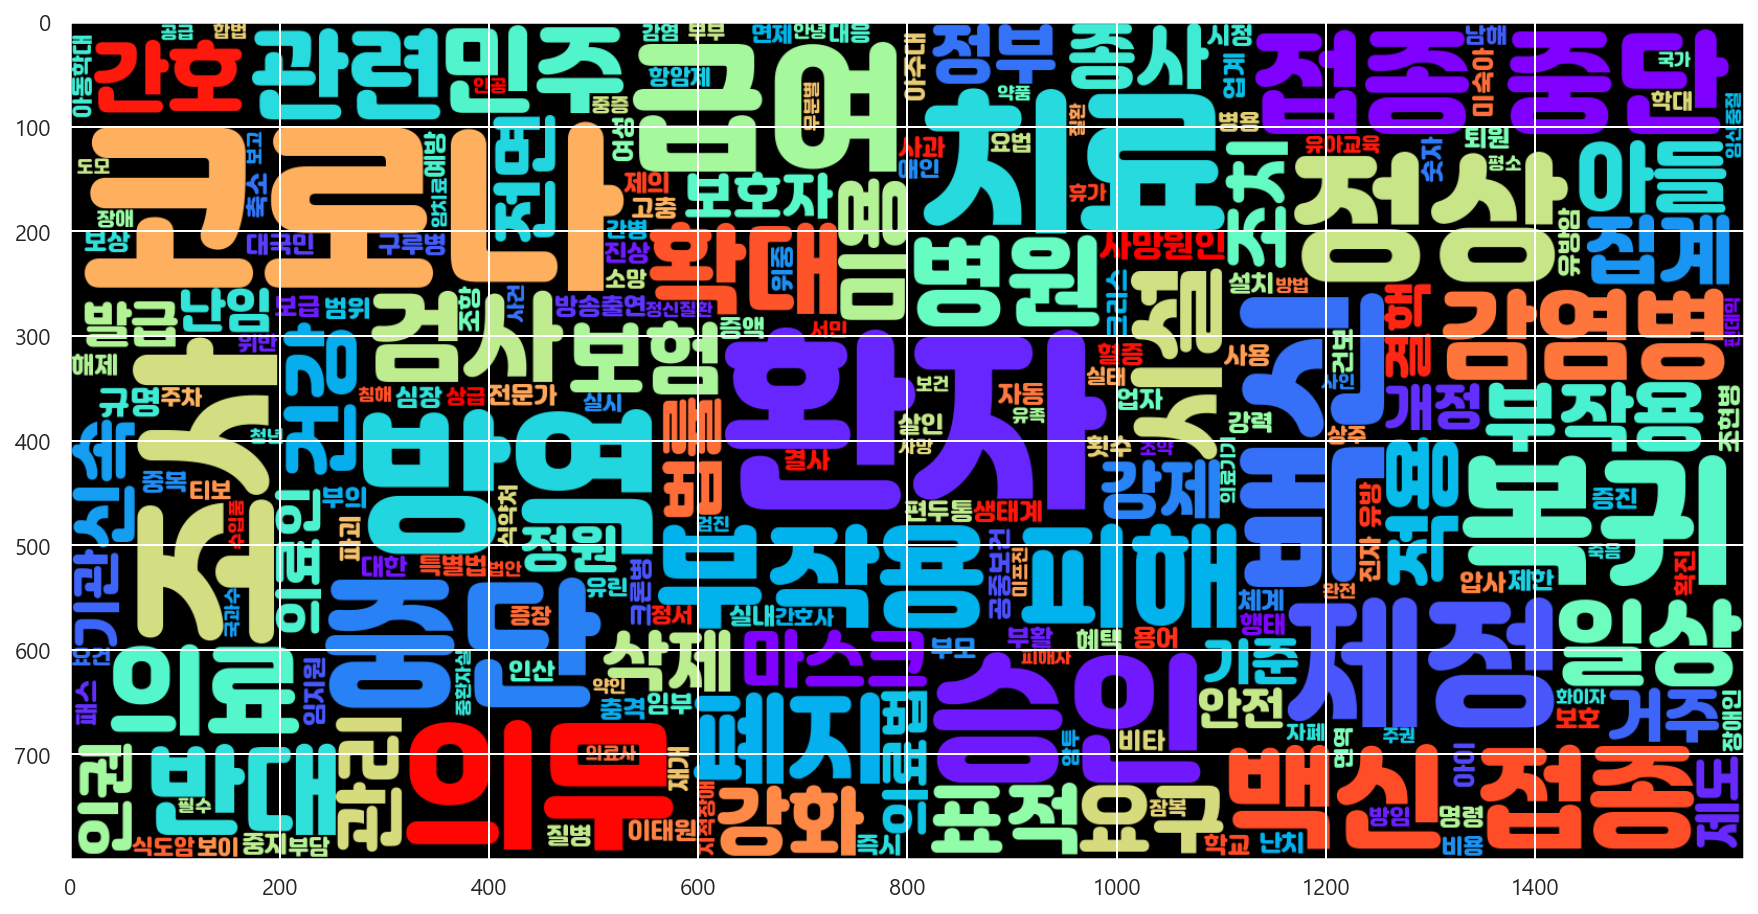

In [46]:
plt.figure(figsize = (15,15))
temp_data = ' '.join(health_petit)
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = 'Jalnan.ttf',colormap='rainbow').generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')

In [47]:
# 분야별 워드 클라우딩 함수로 만들기
def word_cloding_petit(petit_object):
    object_word = np.hstack(df_w[df_w['청원 분야']==petit_object]['tokenized'].values)
    plt.figure(figsize = (15,15))
    temp_data = ' '.join(object_word)
    wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = 'Jalnan.ttf',colormap='rainbow').generate(temp_data)
    plt.imshow(wc, interpolation = 'bilinear')


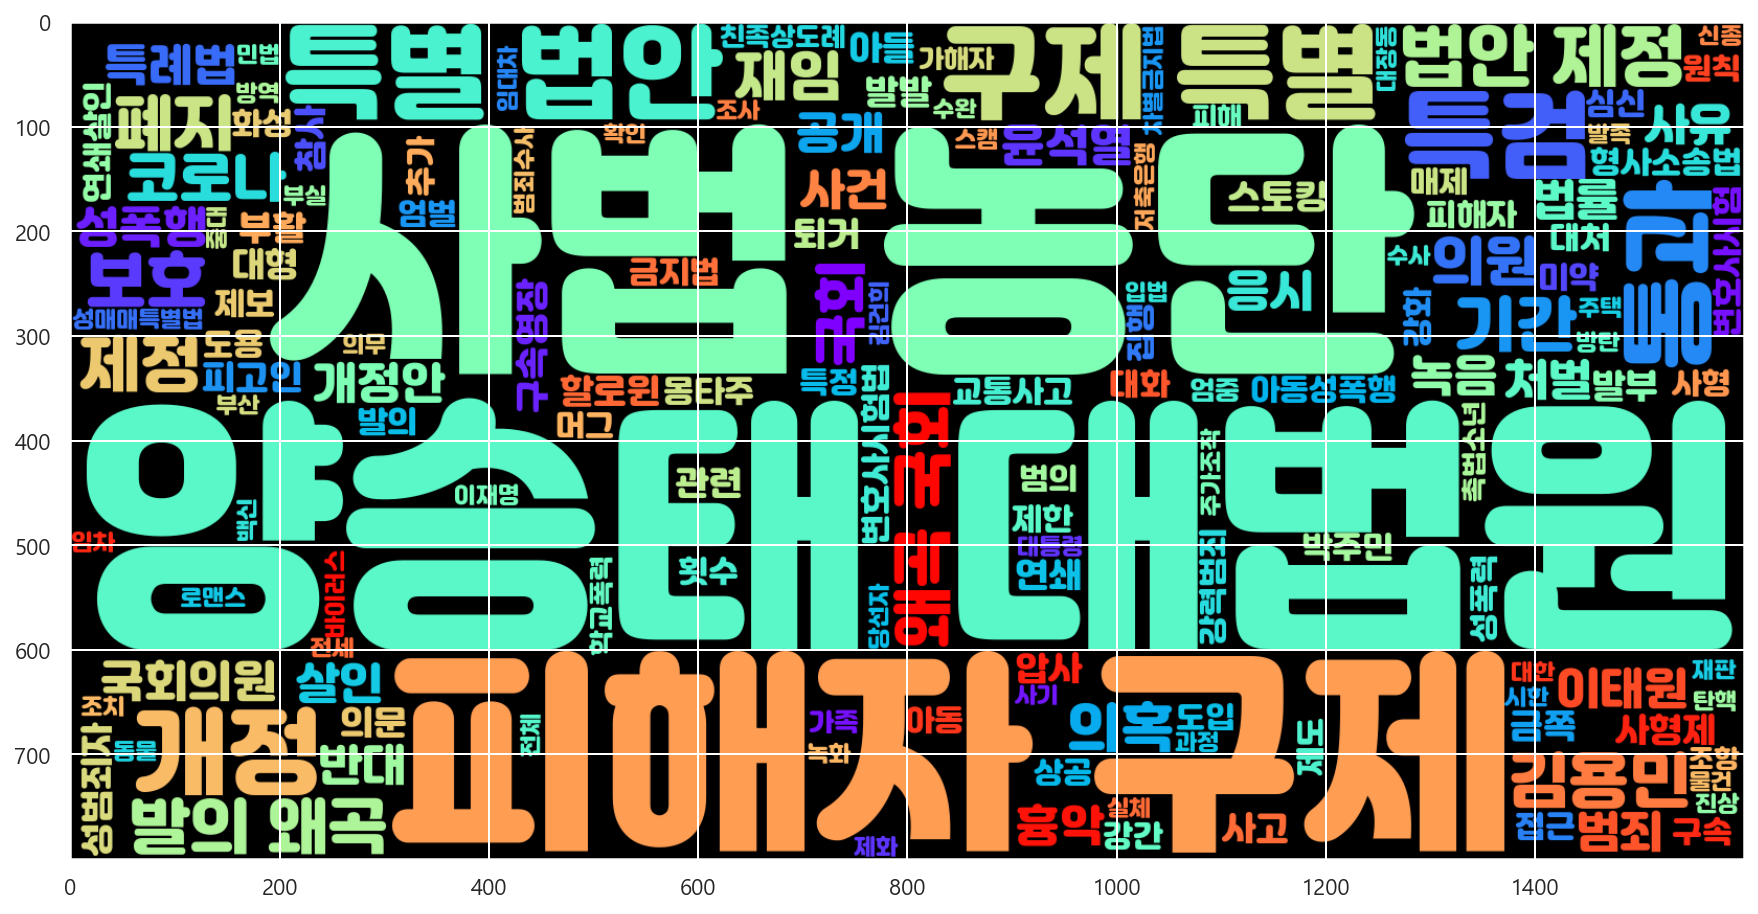

In [48]:
word_cloding_petit('수사/법무/사법제도')